In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
%matplotlib inline

### Setting Style
We will use the plt.style directive to choose appropriate aesthetic styles for our figures. Here we will set the classic style, which ensure that the plots we create use the classic matplotlib style.

In [2]:
plt.style.use('classic')

In [3]:
x = np.linspace(0, 10, 1000)

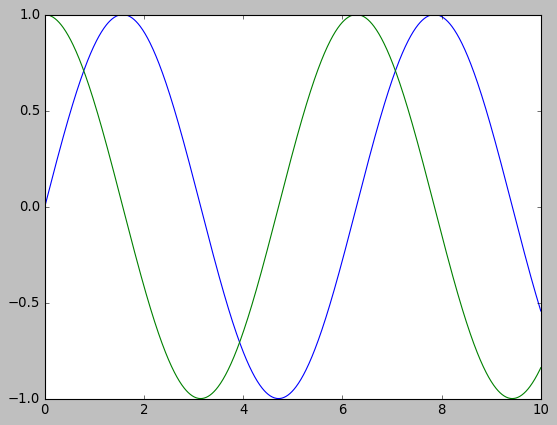

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

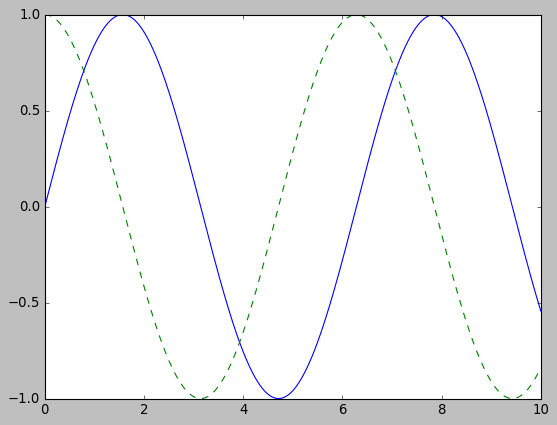

In [5]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show()

#### MATLAB - style Interface

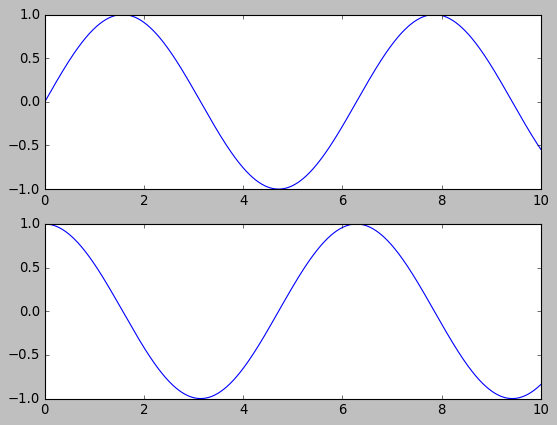

In [6]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

#### Object Oriented interface

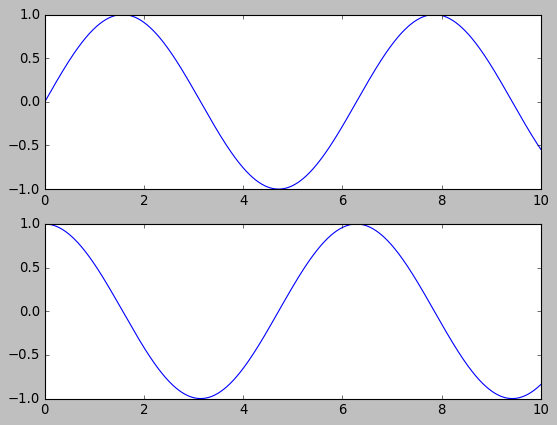

In [7]:
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
plt.show()

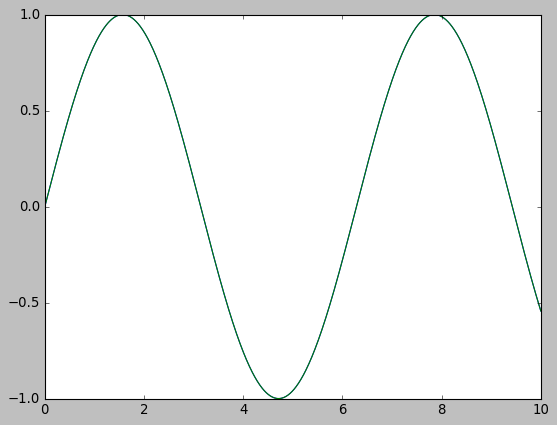

In [8]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
plt.plot(x, np.sin(x))
plt.show()

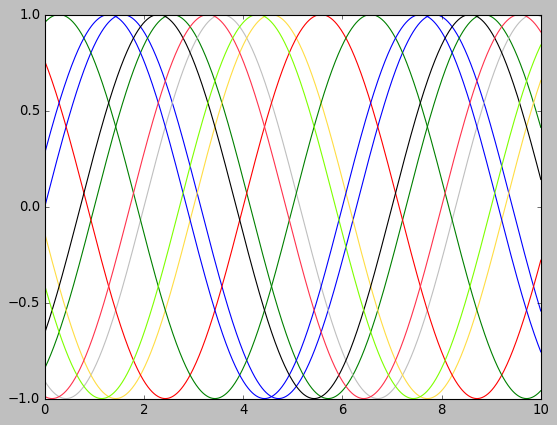

In [9]:
plt.plot(x, np.sin(x-0), color = 'blue')
plt.plot(x, np.sin(x-1), color = 'g')
plt.plot(x, np.sin(x-2), color = '0.75')
plt.plot(x, np.sin(x-3), color = '#FFDD44')
plt.plot(x, np.sin(x-4), color = 'red')
plt.plot(x, np.sin(x-5), color = 'green')
plt.plot(x, np.sin(x-6), color = 'blue')
plt.plot(x, np.sin(x-7), color = 'black')
plt.plot(x, np.sin(x-8), color = (1.0, 0.2, 0.3))
plt.plot(x, np.sin(x-9), color = 'chartreuse')

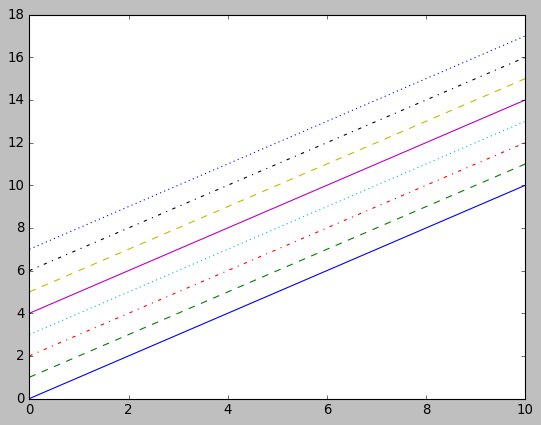

In [10]:
plt.plot(x, x+0, linestyle = 'solid')
plt.plot(x, x+1, linestyle = 'dashed')
plt.plot(x, x+2, linestyle = 'dashdot')
plt.plot(x, x+3, linestyle = 'dotted')

plt.plot(x, x+4, linestyle = '-')
plt.plot(x, x+5, linestyle = '--')
plt.plot(x, x+6, linestyle = '-.')
plt.plot(x, x+7, linestyle = ':')

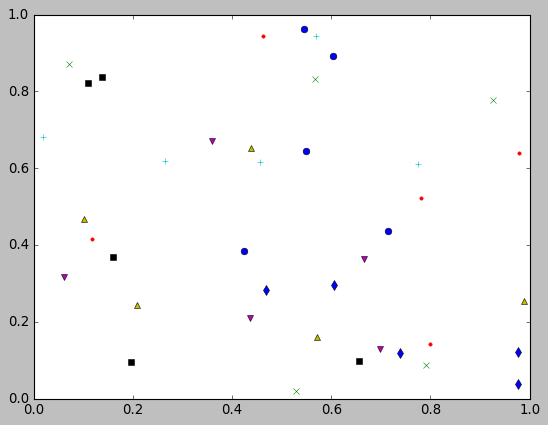

In [11]:
rng = np.random.RandomState(0)
for marker in ['o','x', '.', '+','v', '^', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
            label = "'marker={0}'".format(marker))

(-1.2, 1.2)

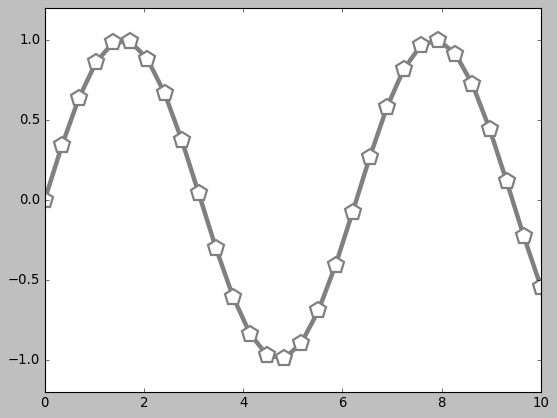

In [12]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, '-p', color = 'gray',
        markersize = 15, linewidth = 4,
        markerfacecolor = 'white',
        markeredgecolor = 'gray',
        markeredgewidth=2)
plt.ylim(-1.2, 1.2)

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


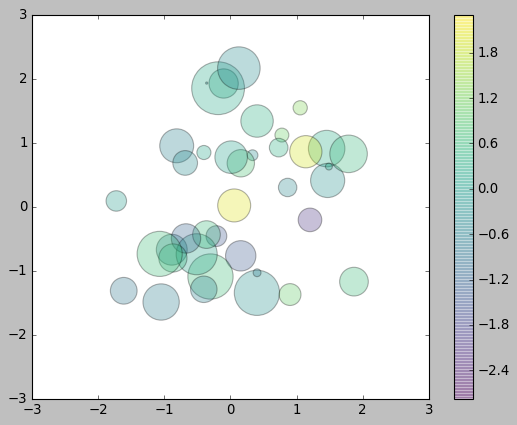

In [13]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000 * rng.randn(100)
plt.scatter(x, y, c = colors, s = sizes, alpha=0.3, cmap = 'viridis')
plt.colorbar()

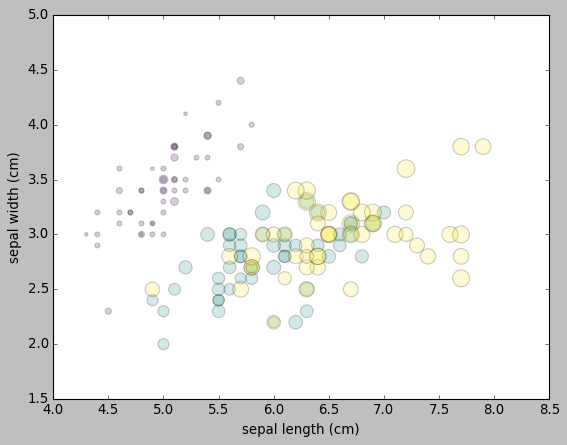

In [14]:
dataset = load_iris()
features = dataset.data.T
plt.scatter(features[0], features[1], alpha=0.2,
           s = 100*features[3], c= dataset.target, cmap = 'viridis')
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.show()

#### Basic Errorbars

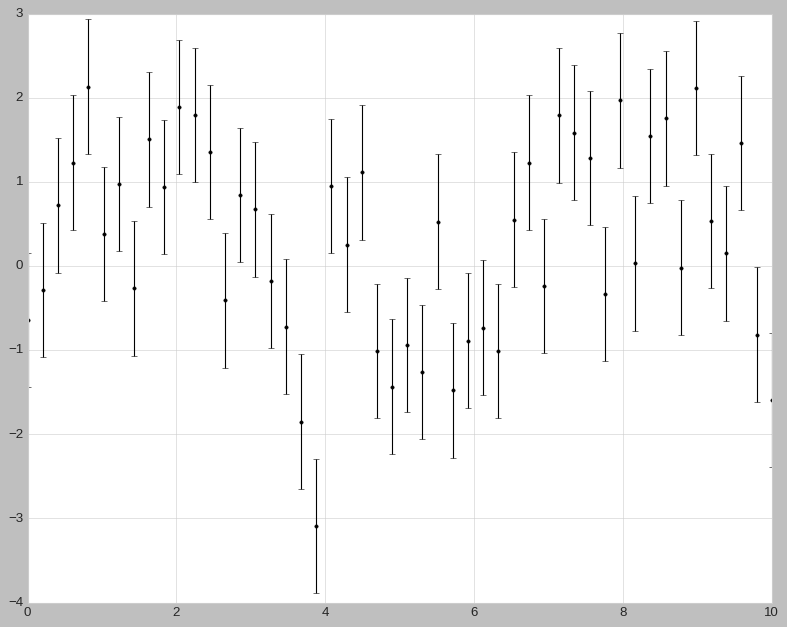

In [15]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + np.random.randn(50)
plt.errorbar(x, y, yerr = dy, fmt = '.k')
plt.tight_layout()
plt.show()

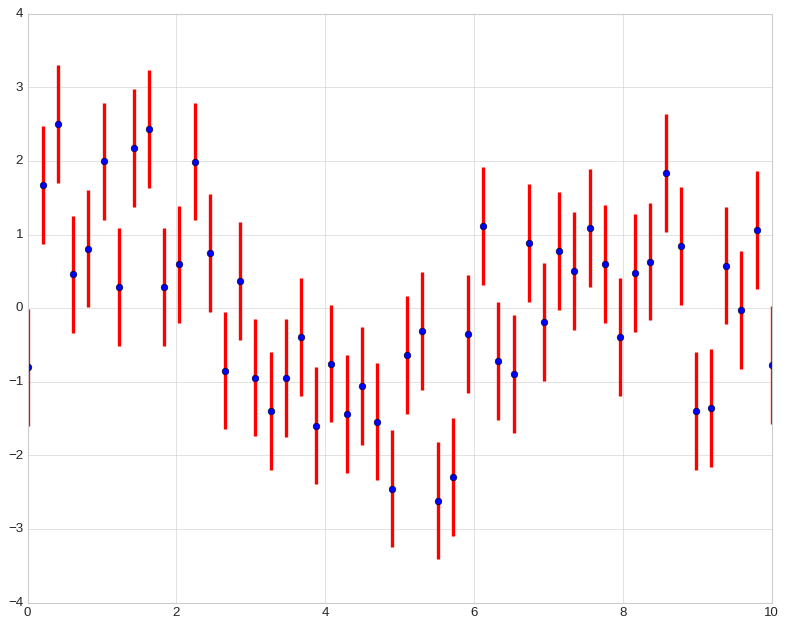

In [16]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + np.random.randn(50)
plt.errorbar(x, y, yerr = dy, fmt = 'o', color = 'blue',
            ecolor = 'red', elinewidth=3, capsize = 0)
plt.tight_layout()
plt.show()

### Continuous Errors

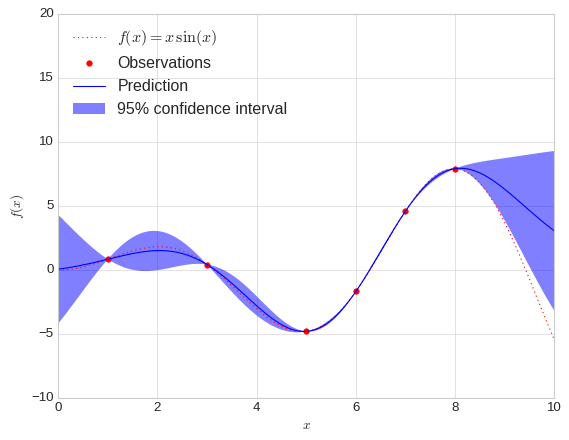

In [17]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')